# **Porozumění problému (Business Understanding)**
### 1. Odvětví, do kterého dataset spadá
- primární oblastí je vzdělávání, konkrétně analýza úspěšnosti studentů,

### 2. Komu tyto informace slouží
- Univerzita a fakulty
  - plánování a zlepšování vzdělávacích programů
- Studijní oddělení, rektoři, děkani
  - intervence a řízení kvality
- Ministerstvo školství a jiné státní instituce
  - financování
- Poradenská centra pro studenty
  - predikce rizikových studentů
- Akademičtí výzkumníci
  - studie vzdělávacích trendů
  
### 3. Jaké problémy řeší
- Jak snížit míru odchodů ze studia a zvýšit úspěšnost dokončení?
- Kteří studenti mají největší riziko neúspěchu?
- Jaké faktory nejvíce ovlivňují úspěšnost dokončení studia?
- Jak brzy lze identifikovat rizikového studenta?
- Jaké vlastnosti mají studenti, kteří dokončí studium včas, ukončí studium nebo prodlouží dobu studia?

# **Porozumění datům (Data Understanding)**
| Atribut | Typ | Význam atributu |
|--------|-----|------------------|
| Marital status | Kategorický | Rodinný stav studenta (svobodný, ženatý/vdaná, ovdovělý/á, rozvedený/á apod.). |
| Application mode | Kategorický | Způsob podání přihlášky (např. online, přes školu, speciální režim). |
| Application order | Číselný | Pořadí zvoleného programu (např. první volba, druhá volba). |
| Course | Kategorický | Studovaný obor, do kterého byl student přijat. |
| Daytime/evening attendance | Kategorický | Jestli student studuje denní nebo večerní formu. |
| Previous qualification | Kategorický/číselný | Nejvyšší dosažené vzdělání před nástupem na školu. |
| Previous qualification (grade) | Číselný | Známky dosažené na předchozím stupni vzdělání. |
| Nacionality | Kategorický | Národnost studenta. |
| Mother's qualification | Kategorický | Nejvyšší dosažené vzdělání matky. |
| Father's qualification | Kategorický | Nejvyšší dosažené vzdělání otce. |
| Mother's occupation | Kategorický | Povolání matky. |
| Father's occupation | Kategorický | Povolání otce. |
| Admission grade | Číselný | Skóre pro přijetí ke studiu. |
| Displaced | Kategorický | Informace, jestli je student vysídlený (např. změna bydliště z důvodu okolností). |
| Educational special needs | Kategorický | Jestli má student speciální vzdělávací potřeby. |
| Debtor | Kategorický | Jestli má student studentskou půjčku. |
| Tuition fees up to date | Kategorický | Informace, jestli má student zaplacené školné. |
| Gender | Kategorický | Pohlaví studenta. |
| Scholarship holder | Kategorický | Jestli student pobírá stipendium. |
| Age at enrollment | Číselný | Věk studenta při zápisu do studijního programu. |
| International | Kategorický | Informace, jestli je student zahraniční student. |
| Curricular units 1st sem (credited) | Číselný | Počet uznaných kreditů v 1. semestru (např. přenesené předměty). |
| Curricular units 1st sem (enrolled) | Číselný | Počet zapsaných předmětů v 1. semestru. |
| Curricular units 1st sem (evaluations) | Číselný | Počet předmětů, které student hodnotil nebo dokončil v 1. semestru. |
| Curricular units 1st sem (approved) | Číselný | Počet úspěšně absolvovaných předmětů v 1. semestru. |
| Curricular units 1st sem (grade) | Číselný | Průměrná známka nebo skóre za 1. semestr. |
| Curricular units 1st sem (without evaluations) | Číselný | Počet nezakončených nebo nehodnocených předmětů v 1. semestru. |
| Curricular units 2nd sem (credited) | Číselný | Počet uznaných kreditů v 2. semestru. |
| Curricular units 2nd sem (enrolled) | Číselný | Počet zapsaných předmětů v 2. semestru. |
| Curricular units 2nd sem (evaluations) | Číselný | Počet dokončených nebo hodnocených předmětů v 2. semestru. |
| Curricular units 2nd sem (approved) | Číselný | Počet úspěšně dokončených předmětů v 2. semestru. |
| Curricular units 2nd sem (grade) | Číselný | Průměrná známka nebo skóre za 2. semestr. |
| Curricular units 2nd sem (without evaluations) | Číselný | Počet nezakončených nebo nehodnocených předmětů ve 2. semestru. |
| Unemployment rate | Číselný | Míra nezaměstnanosti v období, kdy student nastoupil. |
| Inflation rate | Číselný | Inflace v období studia nebo přijetí. |
| GDP | Číselný | Hodnota HDP země v daném období. |
| Target | Kategorický | Výsledek studia (např. dropout, enrolled, graduate). |

In [31]:
# Importy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.metrics import classification_report, confusion_matrix, balanced_accuracy_score
from sklearn.inspection import permutation_importance
from sklearn.tree import plot_tree

In [32]:
# Načtení datasetu
# Oddělovač je středník
df = pd.read_csv(
    "data.csv",
    sep=';',
    engine='python'
)

In [33]:
# Základní průzkum dat
# Zobrazení prvních několika řádků
# Zjištění rozměrů datasetu
print("Hlavička:\n", df.head(), "\n")
print("Rozměry datasetu:\n", df.shape, "\n")
print("Informace o datech:\n", df.info(), "\n")
print("Sloupce:\n", df.columns, "\n")

Hlavička:
    Marital status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime/evening attendance\t  Previous qualification  \
0                             1                       1   
1                             1                       1   
2                             1                       1   
3                             1                       1   
4                             0                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                           122.0            1                      19   
1                           160.0            1                       1   
2              

In [34]:
# Analýza datových typů
print("Počet výskytů jednotlivých datových typů:\n", df.dtypes.value_counts(), "\n")
print("Datové typy sloupců:\n", df.dtypes, "\n")

Počet výskytů jednotlivých datových typů:
 int64      29
float64     7
object      1
Name: count, dtype: int64 

Datové typy sloupců:
 Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance\t                        int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           i

In [35]:
# Kontrola chybějících hodnot
print("Počet chybějících hodnot:\n", df.isnull().sum(), "\n")
print("Podíl chybějících hodnot:\n", df.isna().mean().sort_values(ascending = False), "\n")

Počet chybějících hodnot:
 Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                   

In [36]:
# Základní statistiky pro číselné sloupce
print("Základní statistiky:\n", df.describe().T, "\n")
print("Základní statistiky pro kategorické sloupce:\n", df.describe(include=['object', 'category']).T, "\n")

Základní statistiky:
                                                  count         mean  \
Marital status                                  4424.0     1.178571   
Application mode                                4424.0    18.669078   
Application order                               4424.0     1.727848   
Course                                          4424.0  8856.642631   
Daytime/evening attendance\t                    4424.0     0.890823   
Previous qualification                          4424.0     4.577758   
Previous qualification (grade)                  4424.0   132.613314   
Nacionality                                     4424.0     1.873192   
Mother's qualification                          4424.0    19.561935   
Father's qualification                          4424.0    22.275316   
Mother's occupation                             4424.0    10.960895   
Father's occupation                             4424.0    11.032324   
Admission grade                                 4424.0 

In [37]:
# Analýza unikátních hodnot v každém sloupci
print("Počet unikátních hodnot v každém sloupci:\n", df.nunique().sort_values(), "\n")

Počet unikátních hodnot v každém sloupci:
 Scholarship holder                                  2
International                                       2
Gender                                              2
Tuition fees up to date                             2
Daytime/evening attendance\t                        2
Debtor                                              2
Educational special needs                           2
Displaced                                           2
Target                                              3
Marital status                                      6
Application order                                   8
Inflation rate                                      9
Unemployment rate                                  10
Curricular units 2nd sem (without evaluations)     10
GDP                                                10
Curricular units 1st sem (without evaluations)     11
Previous qualification                             17
Course                                 

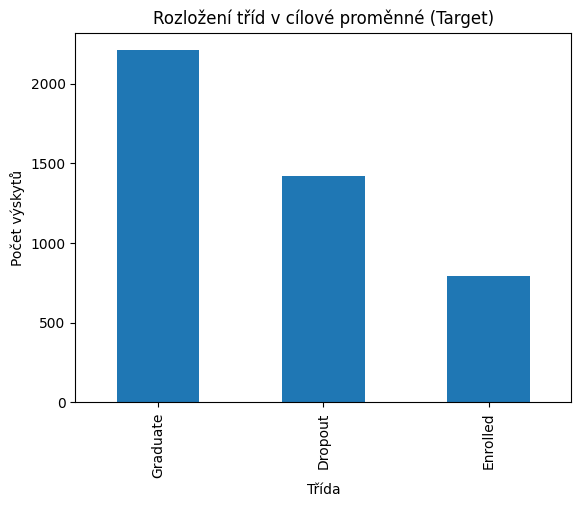

In [38]:
# Vizualizace rozložení cílové proměnné 'Target'
df['Target'].value_counts().plot(kind='bar')
plt.title('Rozložení tříd v cílové proměnné (Target)')
plt.xlabel('Třída')
plt.ylabel('Počet výskytů')
plt.show()

/var/folders/6w/ypf5xy7s5vx9tsd3rg2fr9qh0000gn/T/ipykernel_61215/1936826797.py:6: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/michaelahoskova/Documents/GitHub/4IZ566-FIS-VSE/venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


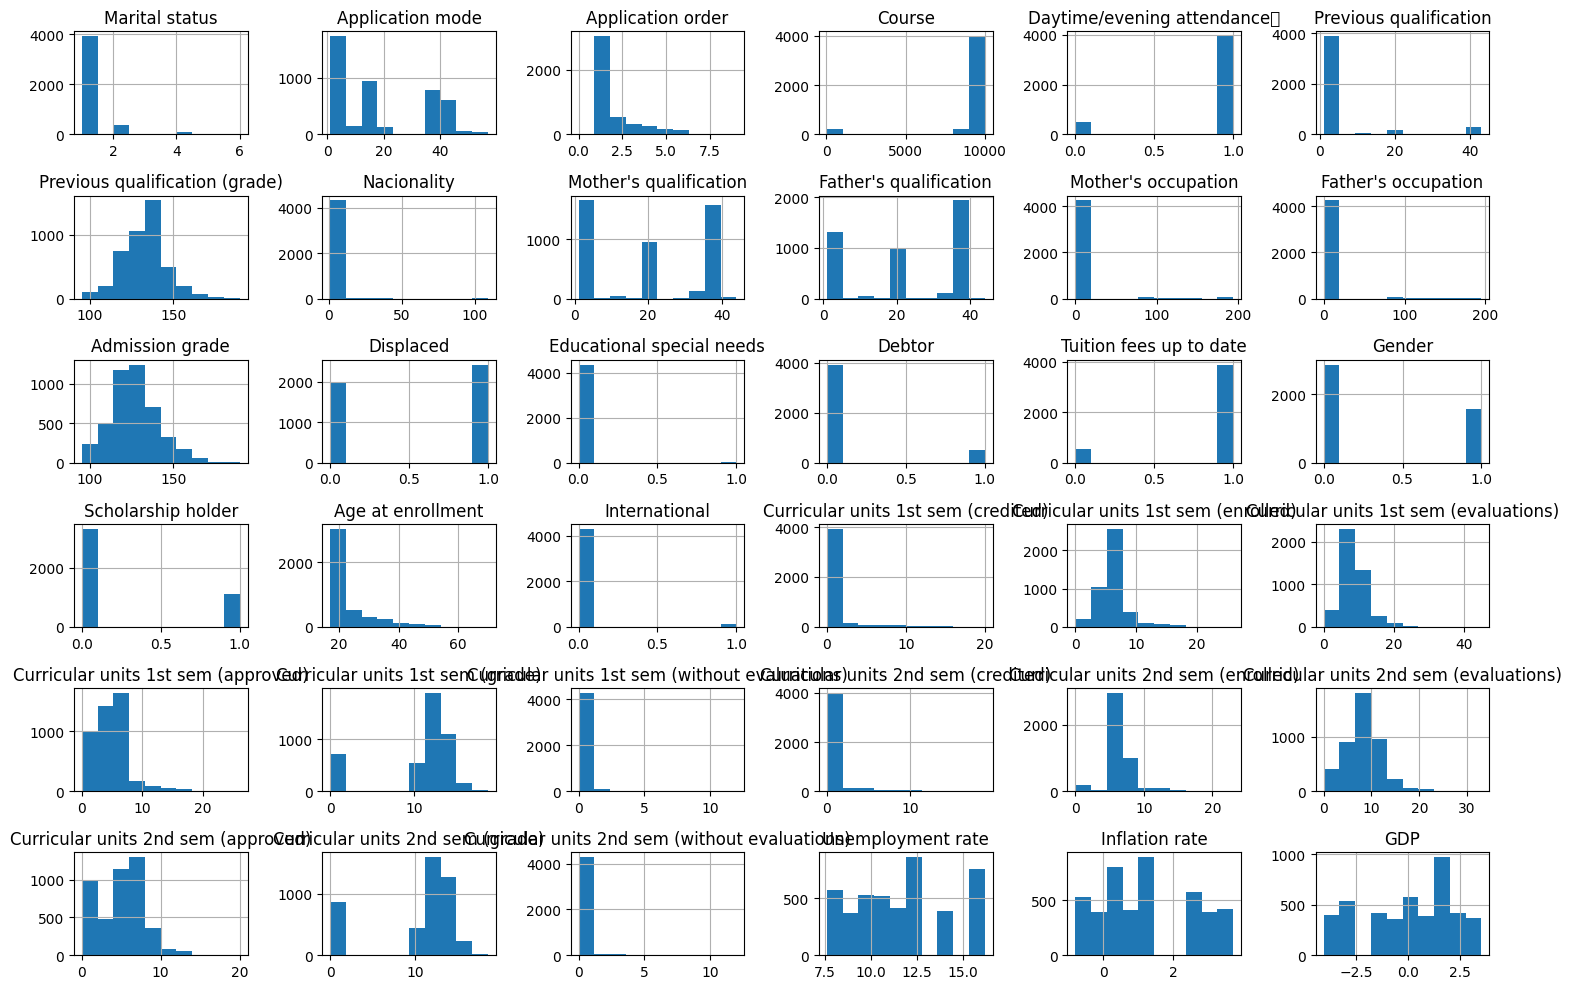

In [39]:
# Analýza kategorických atributů
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_cols].describe().T

df[numerical_cols].hist(figsize=(15,10))
plt.tight_layout()
plt.show()

In [40]:
# Korelační matice pro numerické atributy
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols].head()

for col in categorical_cols[:5]:
    print(f"\n{col}:\n", df[col].value_counts())


Target:
 Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64


/Users/michaelahoskova/Documents/GitHub/4IZ566-FIS-VSE/venv/lib/python3.13/site-packages/seaborn/utils.py:61: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/Users/michaelahoskova/Documents/GitHub/4IZ566-FIS-VSE/venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


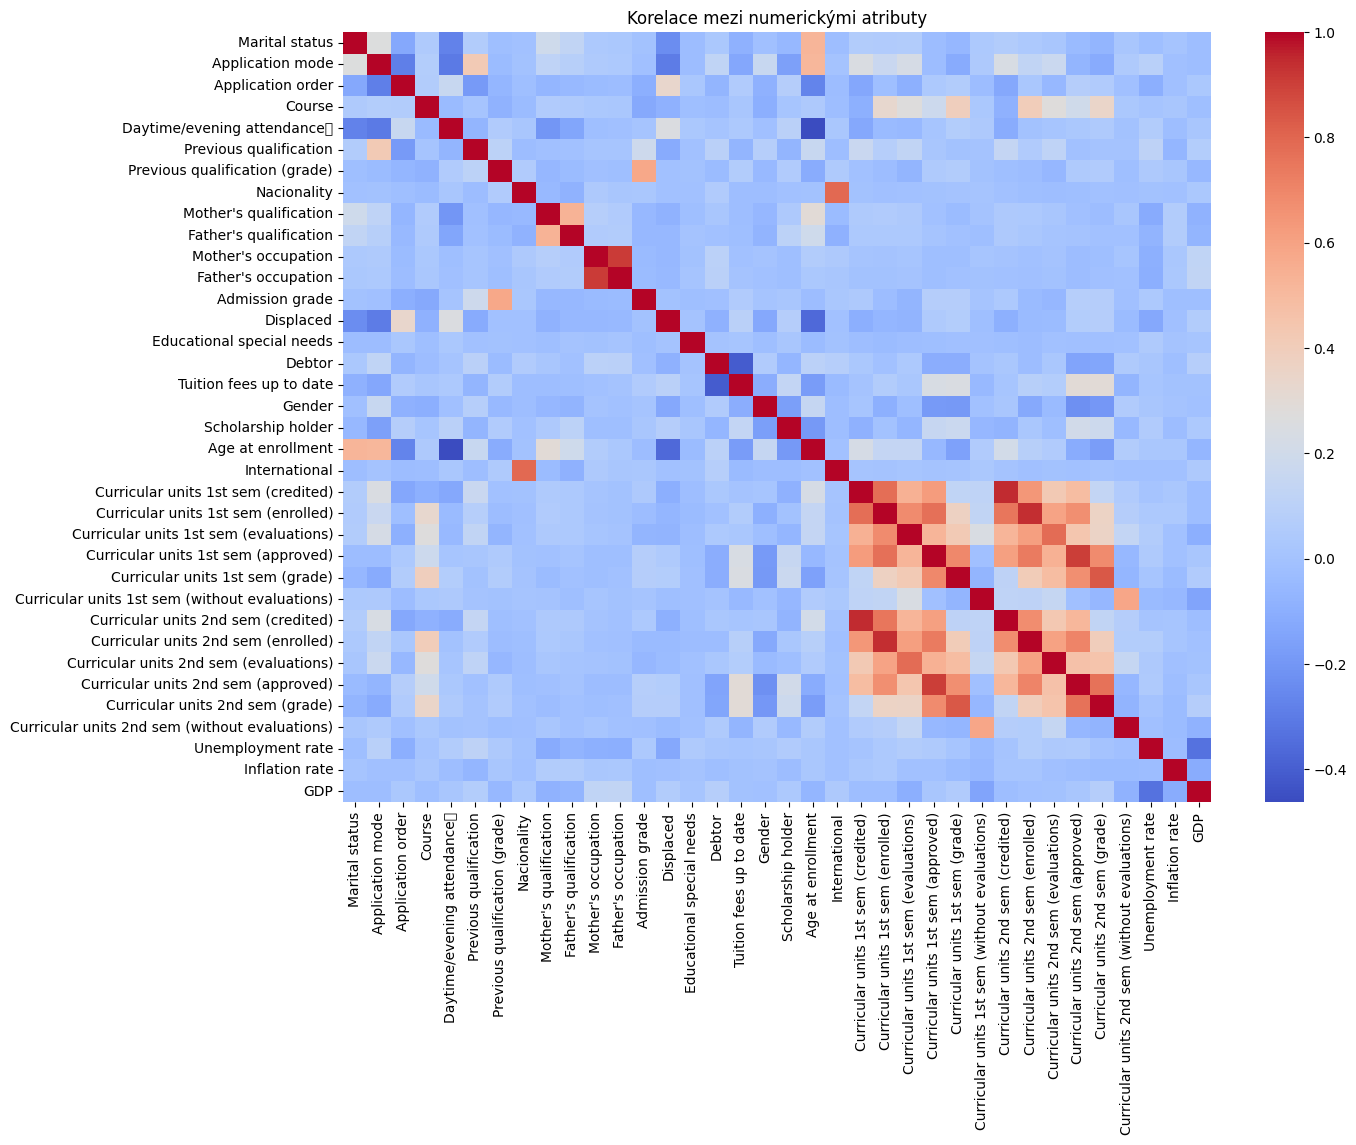

In [41]:
# Korelační matice pro numerické atributy
corr = df.corr(numeric_only=True)
plt.figure(figsize=(14,10))
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title('Korelace mezi numerickými atributy')
plt.show()

In [42]:
# Paměť datasetu
mem_mb = df.memory_usage(deep=True).sum() / 1024**2
print(f"Memory usage (MB): {mem_mb:.2f}")

Memory usage (MB): 1.45


In [43]:
#  Sjednocení názvů sloupců (bez ztráty informace)
orig_cols = df.columns.tolist()
new_cols = []
for c in df.columns:
    c = str(c)
    c = c.replace("\t", " ").replace("\n", " ").strip()
    c = re.sub(r"\s+", " ", c)
    c = c.lower().replace(' ', '_')
    c = re.sub(r'[^a-z0-9_]', '', c)
    new_cols.append(c)
df.columns = new_cols

if orig_cols != df.columns.tolist():
    print("Názvy sloupců byly sjednoceny (snake_case).")
print(df.columns.tolist()[:10], '... celkem', len(df.columns), 'sloupců')

Názvy sloupců byly sjednoceny (snake_case).
['marital_status', 'application_mode', 'application_order', 'course', 'daytimeevening_attendance', 'previous_qualification', 'previous_qualification_grade', 'nacionality', 'mothers_qualification', 'fathers_qualification'] ... celkem 37 sloupců


In [44]:
# Pohled na binární sloupce

likely_binary = [
    'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date',
    'Scholarship holder', 'International', 'Gender'
]
for col in [c for c in likely_binary if c in df.columns]:
    print(f"\nUnikátní hodnoty v '{col}': {df[col].unique()}")

In [45]:
# Duplicitní řádky
dups = int(df.duplicated().sum())
print(f"Počet duplicitních řádků: {dups}")

Počet duplicitních řádků: 0


In [48]:
# Distribuce cílové proměnné
if 'target' in df.columns:
    print("\nDistribuce tříd target:")
    print(df['target'].value_counts(dropna=False))
else:
    print(": Sloupec 'target' nenalezen!")


Distribuce tříd target:
target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64


In [49]:
# Rozdělení na numerické a kategorické atributy
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()
print(f"Numerických sloupců: {len(num_cols)}, Kategorických sloupců: {len(cat_cols)}")

# Statistiky numerických sloupců
num_summary = df[num_cols].agg(['min','max','mean','std']).T.sort_index()
print("\nRozsahy numerických sloupců (min/max/mean/std):")
print(num_summary)

Numerických sloupců: 36, Kategorických sloupců: 1

Rozsahy numerických sloupců (min/max/mean/std):
                                                min          max         mean  \
admission_grade                               95.00   190.000000   126.978119   
age_at_enrollment                             17.00    70.000000    23.265145   
application_mode                               1.00    57.000000    18.669078   
application_order                              0.00     9.000000     1.727848   
course                                        33.00  9991.000000  8856.642631   
curricular_units_1st_sem_approved              0.00    26.000000     4.706600   
curricular_units_1st_sem_credited              0.00    20.000000     0.709991   
curricular_units_1st_sem_enrolled              0.00    26.000000     6.270570   
curricular_units_1st_sem_evaluations           0.00    45.000000     8.299051   
curricular_units_1st_sem_grade                 0.00    18.875000    10.640822   
curricular

In [50]:
# Kontrola negativních hodnot sloupců
count_like_patterns = ['(credited)', '(enrolled)', '(evaluations)', '(approved)', '(without evaluations)']
count_like_cols = [c for c in num_cols if any(pat.lower() in c.lower() for pat in count_like_patterns)]

neg_counts = {c: int((df[c] < 0).sum()) for c in count_like_cols if (df[c] < 0).any()}
if len(neg_counts) > 0:
    print("\nUPOZORNĚNÍ: Negativní hodnoty v počtových sloupcích:", neg_counts)
else:
    print("\nOK: Žádné negativní hodnoty v počtových sloupcích.")


OK: Žádné negativní hodnoty v počtových sloupcích.


In [53]:
# Logické vazby mezi semestry
approved_cols     = [c for c in df.columns if '(approved)' in c.lower()]
enrolled_cols     = [c for c in df.columns if '(enrolled)' in c.lower()]
evaluations_cols  = [c for c in df.columns if '(evaluations)' in c.lower()]
without_eval_cols = [c for c in df.columns if '(without evaluations)' in c.lower()]
grade_cols        = [c for c in df.columns if 'grade' in c]

appr_1 = [c for c in approved_cols if '1st sem' in c.lower()]
enr_1  = [c for c in enrolled_cols  if '1st sem' in c.lower()]
eva_1  = [c for c in evaluations_cols if '1st sem' in c.lower()]
wo_1   = [c for c in without_eval_cols if '1st sem' in c.lower()]

appr_2 = [c for c in approved_cols if '2nd sem' in c.lower()]
enr_2  = [c for c in enrolled_cols  if '2nd sem' in c.lower()]
eva_2  = [c for c in evaluations_cols if '2nd sem' in c.lower()]
wo_2   = [c for c in without_eval_cols if '2nd sem' in c.lower()]

issues = []

# 1st sem
appr_1_col = appr_1[0] if len(appr_1) == 1 else None
enr_1_col  = enr_1[0]  if len(enr_1)  == 1 else None
eva_1_col  = eva_1[0]  if len(eva_1)  == 1 else None
wo_1_col   = wo_1[0]   if len(wo_1)   == 1 else None

if appr_1_col is not None and eva_1_col is not None:
    bad = int((df[appr_1_col] > df[eva_1_col]).sum())
    if bad:
        issues.append(f"1st sem: {bad} řádků má approved > evaluations ({appr_1_col} > {eva_1_col})")

if eva_1_col is not None and enr_1_col is not None:
    bad = int((df[eva_1_col] > df[enr_1_col]).sum())
    if bad:
        issues.append(f"1st sem: {bad} řádků má evaluations > enrolled ({eva_1_col} > {enr_1_col})")

if wo_1_col is not None and eva_1_col is not None and enr_1_col is not None:
    bad = int(((df[wo_1_col] + df[eva_1_col]) > df[enr_1_col]).sum())
    if bad:
        issues.append(f"1st sem: {bad} řádků má (without eval + eval) > enrolled ({wo_1_col} + {eva_1_col} > {enr_1_col})")

# 2nd sem
appr_2_col = appr_2[0] if len(appr_2) == 1 else None
enr_2_col  = enr_2[0]  if len(enr_2)  == 1 else None
eva_2_col  = eva_2[0]  if len(eva_2)  == 1 else None
wo_2_col   = wo_2[0]   if len(wo_2)   == 1 else None

if appr_2_col is not None and eva_2_col is not None:
    bad = int((df[appr_2_col] > df[eva_2_col]).sum())
    if bad:
        issues.append(f"2nd sem: {bad} řádků má approved > evaluations ({appr_2_col} > {eva_2_col})")

if eva_2_col is not None and enr_2_col is not None:
    bad = int((df[eva_2_col] > df[enr_2_col]).sum())
    if bad:
        issues.append(f"2nd sem: {bad} řádků má evaluations > enrolled ({eva_2_col} > {enr_2_col})")

if wo_2_col is not None and eva_2_col is not None and enr_2_col is not None:
    bad = int(((df[wo_2_col] + df[eva_2_col]) > df[enr_2_col]).sum())
    if bad:
        issues.append(f"2nd sem: {bad} řádků má (without eval + eval) > enrolled ({wo_2_col} + {eva_2_col} > {enr_2_col})")

if len(issues) > 0:
    print("\nLOGICKÉ NESOULADY VE SEMESTRECH:")
    for msg in issues:
        print(" -", msg)
else:
    print("\nOK: Logické vazby (approved ≤ evaluations ≤ enrolled) drží pro nalezené sloupce.")


OK: Logické vazby (approved ≤ evaluations ≤ enrolled) drží pro nalezené sloupce.


In [ ]:
# Rozsahy známek napříč všemi sloupci
if len(grade_cols) > 0:
    grade_min = float(df[grade_cols].min(axis = None)) # type: ignore
    grade_max = float(df[grade_cols].max(axis = None)) # type: ignore
    print(f"Rozsahy známek (všechny grade-sloupce): min = {grade_min}, max = {grade_max}")
else:
    print("Nenalezeny žádné sloupce '(grade)'.")

Rozsahy známek (všechny grade-sloupce): min = 0.0, max = 190.0  (ověř očekávanou škálu, např. 0–20)


In [55]:
# Kardinalita kategorických atributů
high_card = {c: df[c].nunique() for c in cat_cols if c != 'target' and df[c].nunique() > 50}
if len(high_card) > 0:
    print("\nAtributy s vysokou kardinalitou (n_unique > 50):")
    for k, v in sorted(high_card.items(), key = lambda x: x[1], reverse = True):
        print(f" - {k}: {v}")
else:
    print("\nOK: Žádný kategoriální atribut s extrémně vysokou kardinalitou (kromě Target, pokud by byla).")


OK: Žádný kategoriální atribut s extrémně vysokou kardinalitou (kromě Target, pokud by byla).


In [57]:
# Normalizovaný náhled na cílovou proměnou
if 'target' in df.columns:
    tgt_norm = df['target'].astype(str).str.strip().str.lower()
    print("\nNormalizované varianty target:")
    print(tgt_norm.value_counts())
else:
    print("target nenalezen.")


Normalizované varianty target:
target
graduate    2209
dropout     1421
enrolled     794
Name: count, dtype: int64


# **Předzpracování dat (Preprocessing)**

In [58]:
#  Sjednocení názvů sloupců (bez ztráty informace)
orig_cols = df.columns.tolist()
new_cols = []
for c in df.columns:
    c = str(c)
    c = c.replace("\t", " ").replace("\n", " ").strip()
    c = re.sub(r"\s+", " ", c)
    c = c.lower().replace(' ', '_')
    c = re.sub(r'[^a-z0-9_]', '', c)
    new_cols.append(c)
df.columns = new_cols

if orig_cols != df.columns.tolist():
    print("Názvy sloupců byly sjednoceny.")
print(df.columns.tolist()[:10], '... celkem', len(df.columns), 'sloupců')

['marital_status', 'application_mode', 'application_order', 'course', 'daytimeevening_attendance', 'previous_qualification', 'previous_qualification_grade', 'nacionality', 'mothers_qualification', 'fathers_qualification'] ... celkem 37 sloupců


In [59]:
# Normalizace cílové proměnné 'Target' (stringy -> standard)
assert 'target' in df.columns, "Sloupec 'Target' chybí po přejmenování."
df['target'] = (
    df['target']
    .astype(str)
    .str.strip()
    .str.lower()
    .replace({'graduate':'graduate', 'graduated':'graduate',
              'enrolled':'enrolled',
              'dropout':'dropout', 'dropped':'dropout'})
)

print("Jedinečné hodnoty Target:", df['target'].unique())

# Udělat z targetu ord. kategorii pro přehlednost (ne nutné pro modely)
df['target'] = pd.Categorical(df['target'], categories = ['dropout','enrolled','graduate'], ordered = True)

Jedinečné hodnoty Target: ['dropout' 'graduate' 'enrolled']


In [60]:
# Binární sloupce převedeme na Int8 (0/1)
likely_binary = [
    'displaced','educational_special_needs','debtor','tuition_fees_up_to_date',
    'scholarship_holder','international'
]
likely_binary += ['gender']

for c in [x for x in likely_binary if x in df.columns]:
    vals = set(df[c].dropna().unique().tolist())
    if vals.issubset({0,1}):
        df[c] = df[c].astype('Int8')

# Kategoriální sloupce s nízkou kardinalitou
low_card_cols = []
for c in df.columns:
    if c == 'target': 
        continue
    if df[c].dtype == 'object':
        nunq = df[c].nunique(dropna=True)
        if nunq <= 50:
            df[c] = df[c].astype('category')
            low_card_cols.append(c)

print("Převedeno na category (low-card):", low_card_cols)

Převedeno na category (low-card): []


In [61]:
# Indikátory chybějících hodnot
key_missing_flags = [
    'admission_grade',
    'previous_qualification_grade',
    'curricular_units_1st_sem_grade',
    'curricular_units_2nd_sem_grade'
]
for c in key_missing_flags:
    if c in df.columns and df[c].isna().any():
        df[f'{c}_missing'] = df[c].isna().astype('Int8')

# 3.4b) Imputace: median pro numerické, mode pro kategoriální hodnoty
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()

cat_cols = [c for c in cat_cols if c != 'target']

# numerické imputace
for c in num_cols:
    if df[c].isna().any():
        med = df[c].median()
        df[c] = df[c].fillna(med)

# kategoriální imputace
for c in cat_cols:
    if df[c].isna().any():
        mode_val = df[c].mode(dropna = True)
        fill_val = mode_val.iloc[0] if len(mode_val) else 'missing'
        df[c] = df[c].fillna(fill_val)

print("Chybějící hodnoty po imputaci (součet):", int(df.isna().sum().sum()))

Chybějící hodnoty po imputaci (součet): 0


In [62]:
# Najdi názvy sloupců podle vzorů (již po přejmenování na snake_case)
def col(name):
    return name if name in df.columns else None

s1_enr = col('curricular_units_1st_sem_enrolled')
s1_apr = col('curricular_units_1st_sem_approved')
s1_eva = col('curricular_units_1st_sem_evaluations')
s1_grd = col('curricular_units_1st_sem_grade')
s1_wo  = col('curricular_units_1st_sem_without_evaluations')

# ---- OPRAVA DATA LEAKAGE ----
df['total_enrolled'] = df[s1_enr] if s1_enr else 0
df['total_approved'] = df[s1_apr] if s1_apr else 0
df['total_evaluations'] = df[s1_eva] if s1_eva else 0
df['total_without_evaluations'] = df[s1_wo] if s1_wo else 0

# Míry/rate (s ochranou proti dělení nulou)
if 'total_approved' in df.columns and 'total_evaluations' in df.columns:
    df['approval_rate'] = (df['total_approved'] / df['total_evaluations']).replace([np.inf, -np.inf], np.nan).fillna(0)

# Průměrná známka (pouze 1. semestr)
if s1_grd:
    df['avg_grade'] = df[s1_grd]

# Jednoduché finanční/organizační signály 
df['financial_risk_flag'] = ((df['debtor'] == 1) | (df['tuition_fees_up_to_date'] == 0)).astype('Int8')
df['scholarship_flag'] = (df['scholarship_holder'] == 1).astype('Int8')

print("Nové sloupce (agregované jen z 1. semestru) přidány:", [c for c in ['total_enrolled','total_approved','total_evaluations','total_without_evaluations','approval_rate','avg_grade','financial_risk_flag','scholarship_flag'] if c in df.columns])

Nové sloupce (agregované jen z 1. semestru) přidány: ['total_enrolled', 'total_approved', 'total_evaluations', 'total_without_evaluations', 'approval_rate', 'avg_grade', 'financial_risk_flag', 'scholarship_flag']


In [63]:
# Všechny sloupce, které se týkají 2. semestru
leaky_cols = [c for c in df.columns if '2nd_sem' in c]
print(f"Odstraňuji {len(leaky_cols)} sloupců kvůli data leakage (informace z 2. semestru).")
print(leaky_cols)

# X = všechny vstupy kromě targetu A sloupců z 2. semestru
X = df.drop(columns = ['target'] + leaky_cols, errors='ignore')
y = df['target']

print("\nTvar X:", X.shape, "| Tvar y:", y.shape)
print("Třídy y:", y.unique())
print(y.dtype)

Odstraňuji 6 sloupců kvůli data leakage (informace z 2. semestru).
['curricular_units_2nd_sem_credited', 'curricular_units_2nd_sem_enrolled', 'curricular_units_2nd_sem_evaluations', 'curricular_units_2nd_sem_approved', 'curricular_units_2nd_sem_grade', 'curricular_units_2nd_sem_without_evaluations']

Tvar X: (4424, 38) | Tvar y: (4424,)
Třídy y: ['dropout', 'graduate', 'enrolled']
Categories (3, object): ['dropout' < 'enrolled' < 'graduate']
category


In [64]:
cols_to_drop_1st_sem = [
    'curricular_units_1st_sem_credited',
    'curricular_units_1st_sem_enrolled',
    'curricular_units_1st_sem_evaluations',
    'curricular_units_1st_sem_approved',
    'curricular_units_1st_sem_grade',
    'curricular_units_1st_sem_without_evaluations',
]

X = X.drop(columns=cols_to_drop_1st_sem, errors='ignore')

print("Odstraněné původní semestrální atributy (1. semestr).")
print("\nAktuální počet sloupců v X:", len(X.columns))

# --- DEFINICE RYSŮ PRO SPRÁVNÝ PREPROCESSING ---

# 1. Numerické rysy (pro škálování)
NUMERIC_FEATURES = [
    'application_order', 
    'previous_qualification_grade', 
    'admission_grade',
    'age_at_enrollment', 
    'unemployment_rate', 
    'inflation_rate', 
    'gdp',
    'total_enrolled', 
    'total_approved', 
    'total_evaluations', 
    'total_without_evaluations',
    'approval_rate', 
    'avg_grade'
]

# 2. Kategorické rysy (pro One-Hot Encoding)
CATEGORICAL_FEATURES = [
    'marital_status', 
    'application_mode', 
    'course',
    'previous_qualification', 
    'nacionality',
    'mothers_qualification', 
    'fathers_qualification', 
    'mothers_occupation',
    'fathers_occupation'
]

# 3. Binární rysy
BINARY_FEATURES = [
    'daytimeevening_attendance', 
    'displaced', 
    'educational_special_needs',
    'debtor', 
    'tuition_fees_up_to_date', 
    'gender', 
    'scholarship_holder',
    'international',
    'financial_risk_flag',
    'scholarship_flag'
]

# Rychlá kontrola, zda máme všechny sloupce v X
assert len(NUMERIC_FEATURES) + len(CATEGORICAL_FEATURES) + len(BINARY_FEATURES) == len(X.columns)

print("Finální seznamy rysů pro preprocessing připraveny.")

Odstraněné původní semestrální atributy (1. semestr).

Aktuální počet sloupců v X: 32
Finální seznamy rysů pro preprocessing připraveny.


In [65]:
# Rozdělení s ohledem na vyváženost tříd
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 42, stratify = y
)

# Ověření rozdělení
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print(f"y_train distribuce:\n{y_train.value_counts(normalize=True)}")
print(f"y_test distribuce:\n{y_test.value_counts(normalize=True)}")

X_train shape: (3539, 32), X_test shape: (885, 32)
y_train distribuce:
target
graduate    0.499294
dropout     0.321277
enrolled    0.179429
Name: proportion, dtype: float64
y_test distribuce:
target
graduate    0.499435
dropout     0.320904
enrolled    0.179661
Name: proportion, dtype: float64


# **Modelování (Modeling)**
### 1. Modelovací techniky
- Typ úlohy: **multitřídní klasifikace** (`dropout`, `enrolled`, `graduate`)
- Použité algoritmy:
  - Logistická regrese – jednoduchý baseline, interpretovatelný  
  - Decision Tree – nelineární, snadno vizualizovatelný  
  - Random Forest – ensemble, stabilní a přesný

### 2. Nastavení parametrů modelu
- `class_weight='balanced'` – řeší nevyvážené třídy  
- `random_state=42` – zajišťuje reprodukovatelnost  
- `n_estimators=300`, `max_depth=6`, `learning_rate=0.05` – základní parametry stromových modelů  
- Zatím bez ladění hyperparametrů (cílem je základní srovnání)
  
### 3. Natrénování a porovnání modelů
- Validace: **Stratified K-Fold (k = 5)**  
- Metriky:  
  - `macro F1-score` – průměrná F1 všech tříd  
  - `balanced accuracy` – vyvážená přesnost napříč třídami  
- Porovnání výkonu modelů v tabulce (průměrné výsledky z cross-validace)

### 4. Vyhodnocení modelů
- Vybrán model s nejlepší kombinací `F1_macro` a `balanced_accuracy`  
- Dotrénován na celé trénovací sadě, ověřen na testovací  
- Výstupy:
  - `classification_report`  
  - `confusion_matrix`  
- Cíl: zvolit finální model pro další fázi (**Evaluation** a **Deployment**)

In [66]:
# Definice zpracování číselných a kategorických sloupců

# Pipeline pro numerické rysy
numeric_tf = Pipeline([
    ("imp", SimpleImputer(strategy = "median")),
    ("sc", StandardScaler())
])

# Pipeline pro kategorické rysy
categorical_tf = Pipeline([
    ("imp", SimpleImputer(strategy = "most_frequent")),
    ("oh", OneHotEncoder(handle_unknown = "ignore", sparse_output = False))
])

# Sestavení ColumnTransformeru
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_tf, NUMERIC_FEATURES),
        ("cat", categorical_tf, CATEGORICAL_FEATURES),
        ("bin", 'passthrough', BINARY_FEATURES)
    ],
    remainder='drop'
)

print("ColumnTransformer byl upraven pro správné zpracování kategorických a numerických rysů.")

ColumnTransformer byl upraven pro správné zpracování kategorických a numerických rysů.


In [67]:
# Modely pro porovnání - Lineární regresse, Rozhodovací stromy, Náhodný les
models = {
    "LogReg": LogisticRegression(max_iter = 5000, class_weight = "balanced", solver="saga", n_jobs=-1),
    "DecisionTree": DecisionTreeClassifier(class_weight="balanced", random_state=42),
    "RandomForest": RandomForestClassifier(n_estimators=300, class_weight="balanced", random_state=42, n_jobs=-1),
}

In [68]:
cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
results = []

for name, model in models.items():
    pipe = Pipeline([("pre", preprocessor), ("clf", model)])
    scores = cross_validate(
        pipe, X_train, y_train,
        scoring={"f1_macro": "f1_macro", "bal_acc": "balanced_accuracy"},
        cv = cv, n_jobs = -1, return_train_score = False
    )
    results.append({
        "model": name,
        "f1_macro_mean": float(np.mean(scores["test_f1_macro"])),
        "f1_macro_std": float(np.std(scores["test_f1_macro"])),
        "bal_acc_mean": float(np.mean(scores["test_bal_acc"])),
        "bal_acc_std": float(np.std(scores["test_bal_acc"])),
    })

results_df = pd.DataFrame(results).sort_values(by = "f1_macro_mean", ascending = False)
results_df

,model,f1_macro_mean,f1_macro_std,bal_acc_mean,bal_acc_std
0,LogReg,0.676390,0.020647,0.682054,0.021184
2,RandomForest,0.648502,0.008987,0.642963,0.007978
1,DecisionTree,0.573616,0.015438,0.575136,0.014115


Nejlepší model: LogReg
Balanced accuracy: 0.6621

Classification report:
              precision    recall  f1-score   support

     dropout       0.78      0.67      0.72       284
    enrolled       0.38      0.57      0.45       159
    graduate       0.83      0.75      0.79       442

    accuracy                           0.69       885
   macro avg       0.66      0.66      0.65       885
weighted avg       0.73      0.69      0.71       885


Confusion matrix:


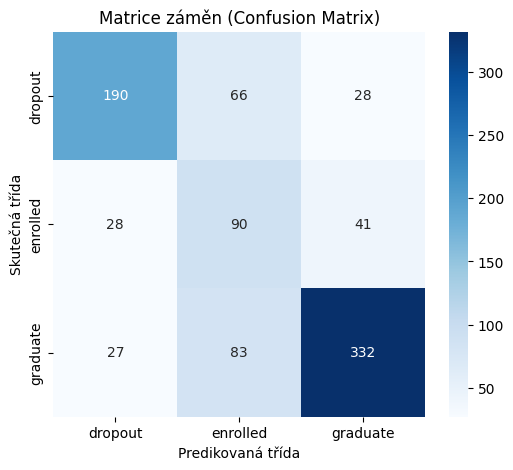

In [69]:
best_model_name = results_df.iloc[0]["model"]
best_model = models[best_model_name]

final_pipe = Pipeline([("pre", preprocessor), ("clf", best_model)])
final_pipe.fit(X_train, y_train)

y_pred = final_pipe.predict(X_test)

print("Nejlepší model:", best_model_name)
print("Balanced accuracy:", round(balanced_accuracy_score(y_test, y_pred), 4))
print("\nClassification report:")
print(classification_report(y_test, y_pred))
print("\nConfusion matrix:")

cm = confusion_matrix(y_test, y_pred, labels=final_pipe.named_steps["clf"].classes_)
labels = final_pipe.named_steps["clf"].classes_

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels, yticklabels=labels)
plt.xlabel("Predikovaná třída")
plt.ylabel("Skutečná třída")
plt.title("Matrice záměn (Confusion Matrix)")
plt.show()

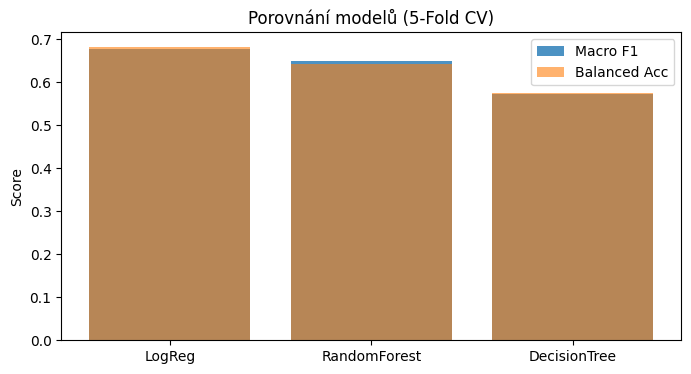

In [70]:
plt.figure(figsize = (8,4))
plt.bar(results_df["model"], results_df["f1_macro_mean"], label = "Macro F1", alpha = 0.8)
plt.bar(results_df["model"], results_df["bal_acc_mean"], label = "Balanced Acc", alpha = 0.6)
plt.ylabel("Score")
plt.title("Porovnání modelů (5-Fold CV)")
plt.legend()
plt.show()

In [71]:
# Získání názvů rysů po transformaci
preprocessor.fit(X_train) 
feature_names_raw = final_pipe.named_steps["pre"].get_feature_names_out()

# Vylepšené čištění jmen
feature_names = []
for name in feature_names_raw:
    if name.startswith('num__'):
        feature_names.append(name.replace('num__', ''))
    elif name.startswith('cat__'):
        feature_names.append(name.replace('cat__', ''))
    elif name.startswith('bin__'):
        feature_names.append(name.replace('bin__', ''))
    else:
        feature_names.append(name.replace('remainder__', ''))

print(f"Názvy rysů (feature_names) byly aktualizovány. Celkový počet: {len(feature_names)}")

Názvy rysů (feature_names) byly aktualizovány. Celkový počet: 232


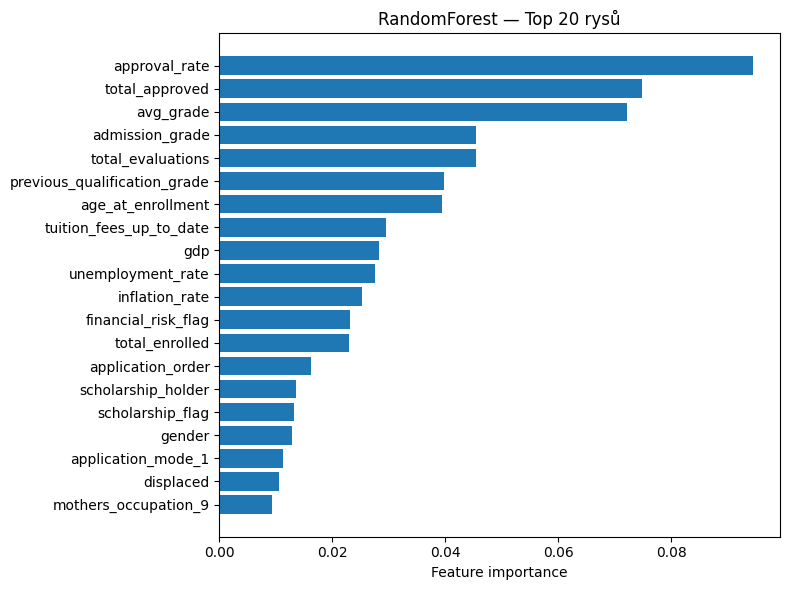

In [72]:
rf = RandomForestClassifier(n_estimators = 300, class_weight="balanced", random_state = 42, n_jobs = -1)
rf_pipe = Pipeline([("pre", preprocessor), ("clf", rf)])
rf_pipe.fit(X_train, y_train)

rf_importances = rf_pipe.named_steps["clf"].feature_importances_
idx = np.argsort(rf_importances)[::-1][:20]

plt.figure(figsize = (8,6))
plt.barh([feature_names[i] for i in idx[::-1]], rf_importances[idx[::-1]])
plt.xlabel("Feature importance")
plt.title("RandomForest — Top 20 rysů")
plt.tight_layout()
plt.show()

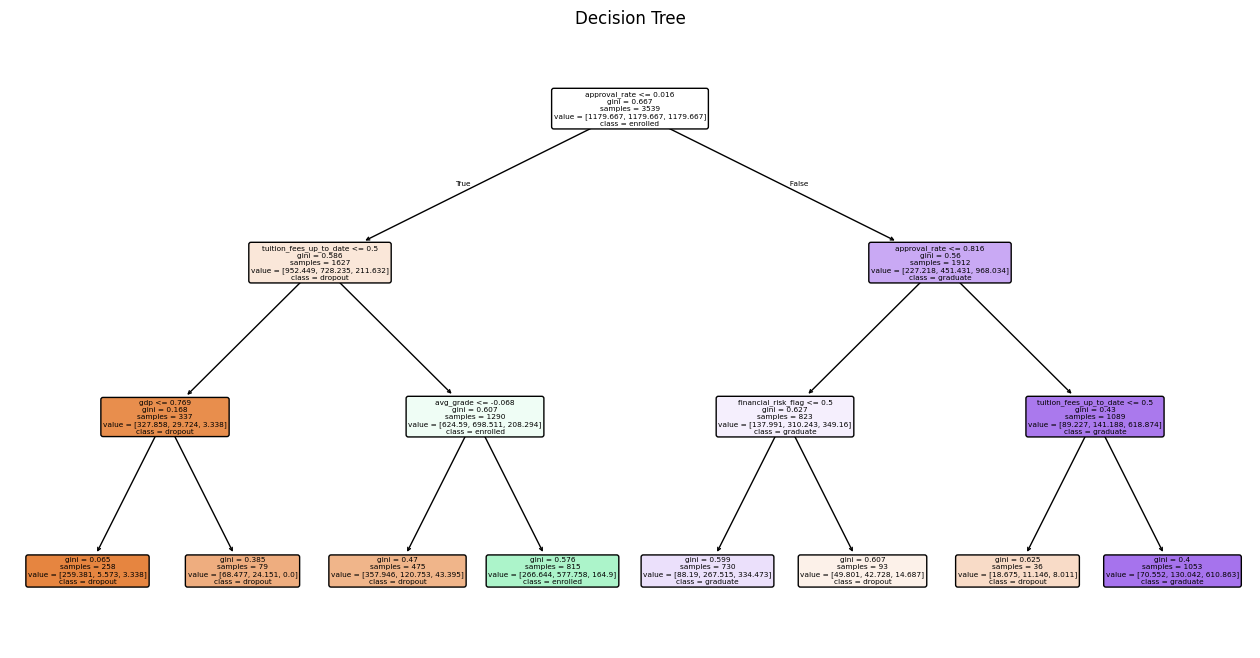

In [73]:
dt = DecisionTreeClassifier(class_weight = "balanced", random_state = 42, max_depth = 3)
dt_pipe = Pipeline([("pre", preprocessor), ("clf", dt)])
dt_pipe.fit(X_train, y_train)

plt.figure(figsize=(16,8))
plot_tree(
    dt_pipe.named_steps["clf"],
    feature_names=feature_names,
    class_names=dt_pipe.named_steps["clf"].classes_.astype(str),
    filled=True, rounded=True, max_depth=3
)
plt.title("Decision Tree")
plt.show()

/Users/michaelahoskova/Documents/GitHub/4IZ566-FIS-VSE/venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


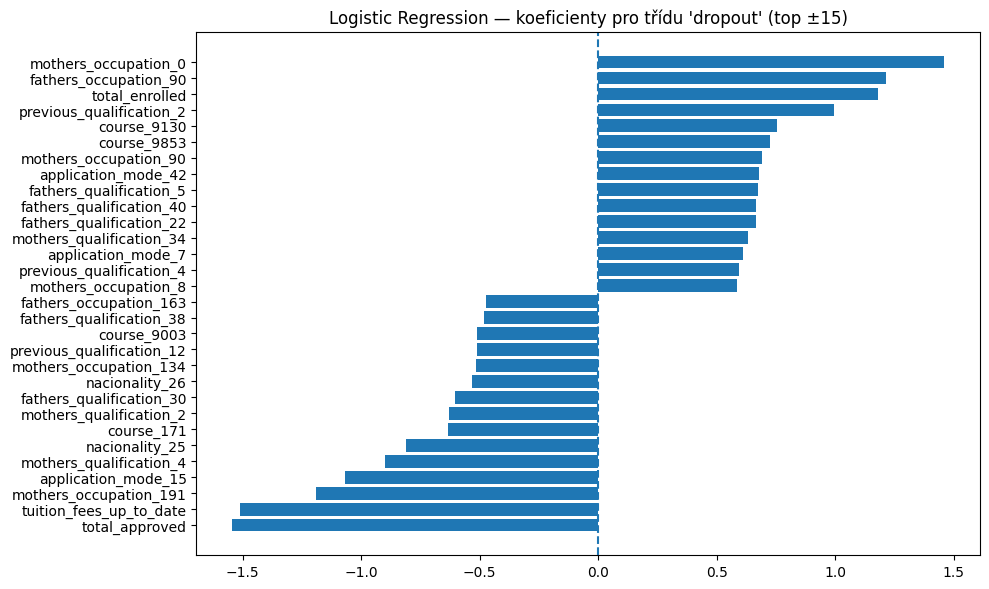

In [74]:
lr = LogisticRegression(max_iter=5000, class_weight="balanced", solver="saga", n_jobs=-1, random_state=42, multi_class="auto")
lr_pipe = Pipeline([("pre", preprocessor), ("clf", lr)])
lr_pipe.fit(X_train, y_train)

classes = lr_pipe.named_steps["clf"].classes_
coef = lr_pipe.named_steps["clf"].coef_

target_class = "dropout"
cls_idx = int(np.where(classes == target_class)[0][0])

weights = coef[cls_idx]
top_pos_idx = np.argsort(weights)[-15:]
top_neg_idx = np.argsort(weights)[:15]
sel_idx = np.concatenate([top_neg_idx, top_pos_idx])

labels = [feature_names[i] for i in sel_idx]
vals = weights[sel_idx]

plt.figure(figsize=(10,6))
plt.barh(labels, vals)
plt.axvline(0, linestyle="--")
plt.title(f"Logistic Regression — koeficienty pro třídu '{target_class}' (top ±15)")
plt.tight_layout()
plt.show()

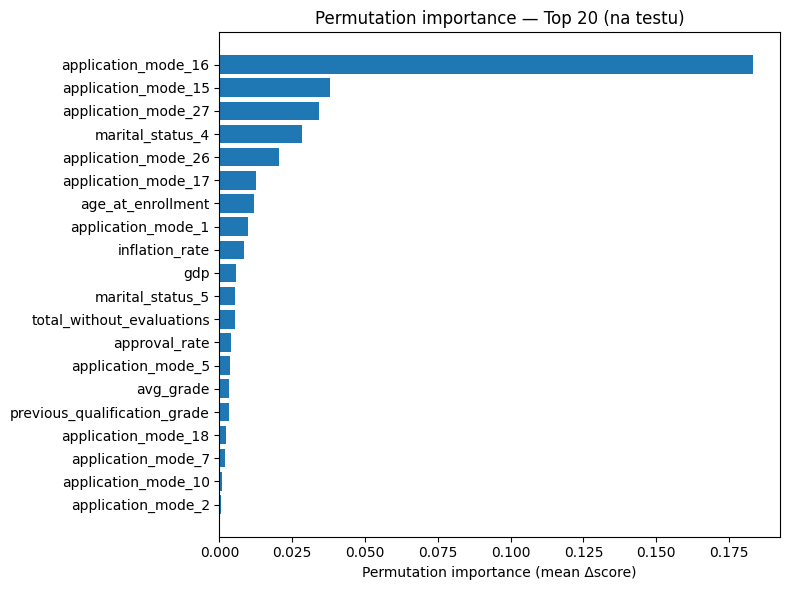

In [75]:
r = permutation_importance(final_pipe, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1, scoring="f1_macro")
idx = np.argsort(r.importances_mean)[::-1][:20]

plt.figure(figsize=(8,6))
plt.barh([feature_names[i] for i in idx[::-1]], r.importances_mean[idx[::-1]])
plt.xlabel("Permutation importance (mean Δscore)")
plt.title("Permutation importance — Top 20 (na testu)")
plt.tight_layout()
plt.show()

# **Vyhodnocení modelů**

V rámci tohoto projektu byl vytvořen model pro včasnou identifikaci studentů ohrožených neúspěchem ve studiu. Oproti původním explorativním analýzám byly implementovány dvě klíčové metodologické úpravy, které zajišťují relevanci a praktickou použitelnost modelu.

## 1. Metodologické opravy

1.  **Odstranění Data Leakage:** Model byl natrénován výhradně na datech dostupných **na konci 1. semestru**. Tím byl odstraněn únik informací z budoucnosti (dat z 2. semestru). Výsledná přesnost modelu je sice o něco nižší než u modelu, který měl k dispozici data z obou semestrů, avšak tento model je **metodologicky správný** a reálně použitelný pro včasnou identifikaci rizikových studentů.
2.  **Správné zpracování kategorických rysů:** Kategorické rysy (jako `course`, `marital_status`, `mothers_occupation`) jsou nyní korektně zpracovány pomocí `OneHotEncoder`.

## 2. Vyhodnocení na testovacích datech

* Nejlepšího výkonu v křížové validaci dosáhl model **Logistická regrese** (`f1_macro_mean: 0.676`, `bal_acc_mean: 0.682`).
* Tento finální model dosáhl na odložené testovací sadě vyvážené přesnosti **0.66** (66 %).
* Z matice záměn a reportu je patrné, že model dobře rozpoznává třídy `Graduate` (F1 = 0.79) a `Dropout` (F1 = 0.72).
* Největší problém má model stále s menšinovou třídou `Enrolled` (F1 = 0.45), kterou má tendenci zaměňovat s ostatními dvěma třídami.

## 3. Klíčové prediktory (po 1. semestru)

Analýza důležitosti rysů (zejména `Permutation importance` a koeficienty `Logistic Regression`) konzistentně ukázala, že nejsilnějšími prediktory úspěchu či neúspěchu jsou akademické výsledky **po prvním semestru**:

* **`avg_grade`**: Průměrná známka za 1. semestr (nejsilnější prediktor).
* **`approval_rate`**: Procentuální úspěšnost v 1. semestru.
* **`total_approved`**: Celkový počet schválených předmětů v 1. semestru.

* **Negativní vliv** (zvyšují šanci na `Dropout`):
    * `financial_risk_flag` (indikátor dluhu nebo neplacení školného)
    * `age_at_enrollment` (vyšší věk při zápisu)
    * Některé specifické obory (např. `course_9070`, `course_9853`)
* **Pozitivní vliv** (snižují šanci na `Dropout`):
    * `scholarship_holder` (student pobírá stipendium)
    * `tuition_fees_up_to_date` (zaplacené školné)